In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

In [2]:
df = pd.read_csv('../data/HAM10000_unique.csv', index_col=0)

In [3]:
df_or = pd.read_csv('../data/HAM10000_original.csv', index_col=0)

In [4]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,mole_type,lesion_type,target
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,benign,2.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
15,HAM_0007207,ISIC_0031326,bkl,histo,65.0,male,back,benign,2.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
20,HAM_0006071,ISIC_0032343,bkl,histo,70.0,female,face,benign,2.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
33,HAM_0005612,ISIC_0024981,bkl,histo,80.0,male,scalp,benign,2.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
34,HAM_0005388,ISIC_0027815,bkl,histo,80.0,male,chest,benign,2.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5514 entries, 10 to 10008
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     5514 non-null   object 
 1   image_id      5514 non-null   object 
 2   dx            5514 non-null   object 
 3   dx_type       5514 non-null   object 
 4   age           5514 non-null   float64
 5   sex           5514 non-null   object 
 6   localization  5514 non-null   object 
 7   mole_type     5514 non-null   object 
 8   lesion_type   5514 non-null   float64
 9   target        5514 non-null   object 
dtypes: float64(2), object(8)
memory usage: 473.9+ KB


In [5]:
np.unique(df.dx.values)

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object)

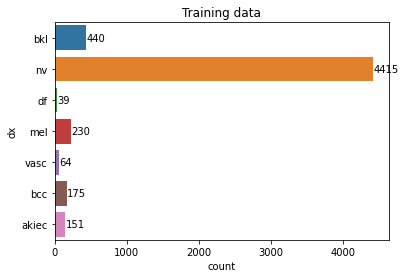

In [6]:
ax = sns.countplot(data=df, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Training data');

### Splitting data 

 * test set 20% of total data
 * validation set 10% of total data
 * training data 70%

In [63]:
train_df, test_df = model_selection.train_test_split(df, random_state=333, shuffle=True, test_size=.2)

In [64]:
train_df, val_df = model_selection.train_test_split(train_df, random_state=333, shuffle=True, test_size=.1)

### Training data set

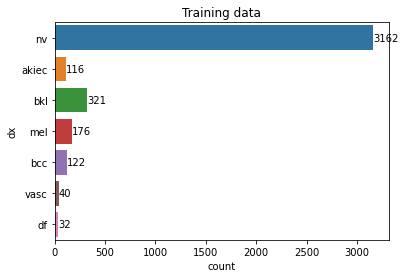

In [65]:
ax = sns.countplot(data=train_df, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Training data');

### Validation dataset

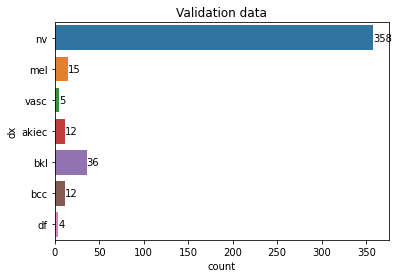

In [66]:
ax = sns.countplot(data=val_df, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Validation data');

### Test data set

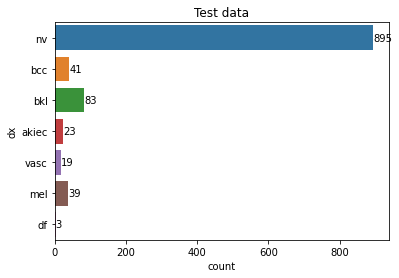

In [67]:
ax = sns.countplot(data=test_df, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Test data');

In [68]:
test_df.to_csv('../data/HAM10000_test.csv')

In [69]:
train_df.to_csv('../data/HAM10000_train.csv')

In [70]:
val_df.to_csv('../data/HAM10000_val.csv')

### Split original dataset - with the same proportions

In [6]:
train_df, test_df = model_selection.train_test_split(df_or, test_size=.2, shuffle=True)

### Original training data set (with the same lesions)

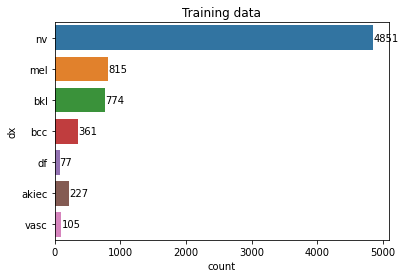

In [11]:
ax = sns.countplot(data=train_df, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Training data');

### Test dataset

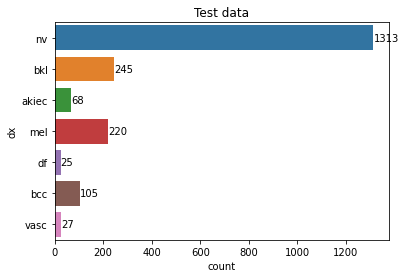

In [15]:
ax = sns.countplot(data=test_df, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Test data');

In [12]:
train_df, val_df = model_selection.train_test_split(train_df, test_size=.1, shuffle=True)

### Validation dataset (with repetitions of lesions)

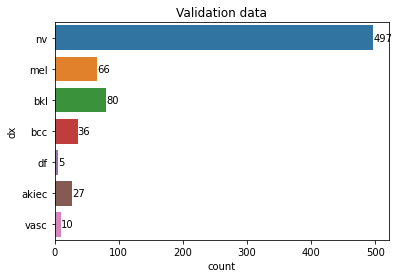

In [14]:
ax = sns.countplot(data=val_df, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Validation data');

In [8]:
train_df.to_csv('../data/HAM10000_train_org.csv')

In [9]:
test_df.to_csv('../data/HAM10000_test_org.csv')

In [10]:
val_df.to_csv('../data/HAM10000_val_org.csv')

### Unique v2 test/val/train split

In [5]:
data = pd.read_csv('../data/HAM_10000_unique_v2.csv')

In [6]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,mole_type,lesion_type,target
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,benign,2.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,benign,2.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,benign,2.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,benign,2.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,benign,2.0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"


In [7]:
data.count()

lesion_id       7470
image_id        7470
dx              7470
dx_type         7470
age             7470
sex             7470
localization    7470
mole_type       7470
lesion_type     7470
target          7470
dtype: int64

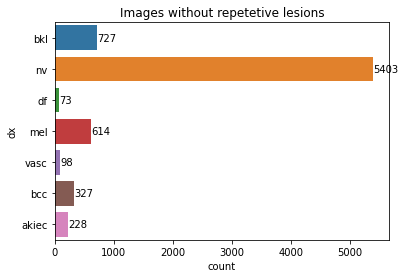

In [8]:
ax = sns.countplot(data=data, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Images without repetetive lesions');

In [9]:
train_df, test_df = model_selection.train_test_split(data, test_size=.2, shuffle=True, random_state=333)

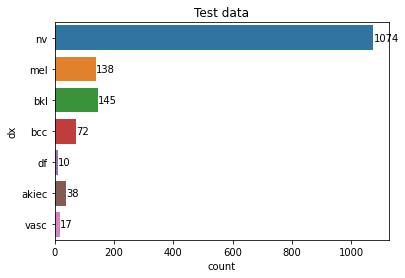

In [10]:
ax = sns.countplot(data=test_df, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Test data');

In [11]:
train_df, val_df = model_selection.train_test_split(train_df, test_size=.2, shuffle=True, random_state=333)

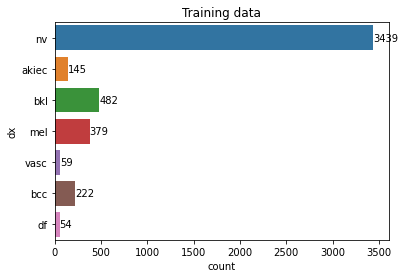

In [13]:
ax = sns.countplot(data=train_df, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Training data');

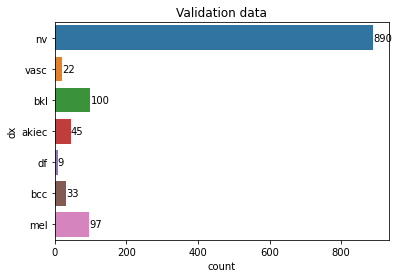

In [22]:
ax = sns.countplot(data=val_df, y='dx')
ax.bar_label(container=ax.containers[0])
ax.set_title('Validation data');

In [24]:
train_df.to_csv('HAM10000_unique_train_v2.csv')

In [25]:
val_df.to_csv('../data/HAM10000_unique_val_v2.csv')

In [26]:
test_df.to_csv('../data/HAM10000_unique_test_v2.csv')